<a href="https://colab.research.google.com/github/bitprj/DigitalHistory/blob/Shayan/Week9-Analyzing-Freedom-on-the-Move/Week9-Analyzing-Freedom-on-the-Move.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center">Freedom on the Move</div>

# Recap


By this time, you should have an understanding of how to implement the following:
- 
- 
- 
- 
- 
- 

# About the Dataset





### Freedom on the Move
<p align="center">
<img src="https://freedomonthemove.org/images/freedom.png" width="200"> 
</p>


### Facts about the dataset

- Freedom on the Move is a database of fugitives from North American slavery.
- They are compiling thousands of stories of resistance that have never been accessible in one place.

- Research driven by us.
- A database full of possibilities.


You can read more about the dataset [here](https://freedomonthemove.org/).

# Practicum and Methodology



# Grading

This exercise has a total of 27 questions. Every question has 1 point. Some questions might have multiple parts but the weight of the question is the same.

In order to work on the questions in this Practicum and submit them for grading, you'll need to run the code block below. It will ask for your student ID number and then create a folder that will house your answers for each question. At the very end of the notebook, there is a code section that will download this folder as a zip file to your computer. This zip file will be your final submission.

In [ ]:
import os
import shutil

!rm -rf sample_data

student_id = input('Please Enter your Student ID: ') # Enter Student ID.

while len(student_id) != 9:
 student_id = int('Please Enter your Student ID: ')  
  
folder_location = f'{student_id}/Week_Six/Practicum'
if not os.path.exists(folder_location):
  os.makedirs(folder_location)
  print('Successfully Created Directory, Lets get started')
else:
  print('Directory Already Exists')

## Load Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import numpy as np

## Load Dataset

In [2]:
url = 'https://bit.ly/3kVBMnZ'

fotm_dataset = pd.read_csv(url, encoding = "ISO-8859-1")

## Using `Pandas` to extract basic information and minor adjusments.

### Print the names of all the columns

In [3]:
fotm_dataset.columns # INSERT CODE HERE

Index(['advertisement.publication_date', 'advertisement.complete',
       'advertiser.name', 'enslaved_person.gender',
       'enslaved_person_languages.does_speak', 'enslaver.fullname',
       'enslaver.gender', 'enslaver.type', 'newspaper.name',
       'runaway.ran_before', 'runaway.profess_freedom',
       'runaway_enslavers.enslaver_status', 'runaway_reward.amount',
       'newspaper_location.city', 'newspaper_location.state',
       'enslaver_location.city', 'enslaver_location.state', 'advertisement.id',
       'advertiser.id', 'newspaper.id', 'newspaper_location.id',
       'runaway_event.id', 'runaway.id', 'enslaved_person.id',
       'enslaved_person_languages.id', 'runaway_enslavers.id', 'enslaver.id',
       'enslaver_location.id', 'runaway_reward.id'],
      dtype='object')

In [4]:
fotm_dataset.head()

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,runaway.profess_freedom,runaway_enslavers.enslaver_status,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state,advertisement.id,advertiser.id,newspaper.id,newspaper_location.id,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,runaway_enslavers.id,enslaver.id,enslaver_location.id,runaway_reward.id
0,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,dbe0cc3f-0898-4eaf-b702-8be2143d970a,577eef00-d0db-463d-8f5a-ca03282733f4,05a63752-e272-48f6-9050-72590c5d7ac9,30efbcb3-23c1-48f5-a349-c34daea5d1fb
1,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,dbe0cc3f-0898-4eaf-b702-8be2143d970a,577eef00-d0db-463d-8f5a-ca03282733f4,05a63752-e272-48f6-9050-72590c5d7ac9,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
2,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,b7ef3786-2260-4cd1-afcf-14776d07af90,30efbcb3-23c1-48f5-a349-c34daea5d1fb
3,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,b7ef3786-2260-4cd1-afcf-14776d07af90,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
4,1830-01-02,True,"Wm. B. Roberts, Executor",MALE,NaN,Rev. Henry Holmes,MALE,deceased,Edenton Gazette And North Carolina General Adv...,NaN,NaN,NaN,15.0,Edenton,US-NC,NaN,US-NC,0001aa96-153e-49e9-9cc1-78ff29cad12f,be248ed4-c224-448a-9db2-23204e05392d,ce244760-13c7-4c98-bfc5-0b6b8cb454f4,dd33c07c-80c1-4d46-b25b-1daf33b57a79,f6f30219-bf53-4835-b90b-68d587aef3ef,cf69ceec-0b4b-4b5c-98bf-bffab1e488c1,bb232988-8487-470f-bc62-d12aa8665d8d,NaN,3f39bcb6-873e-41ed-b8a2-5546d2117e22,ecb5b127-f7f4-4e7c-88fd-b325524a6853,d3cbbc85-a3df-4c44-b689-71693643a223,375fc31d-c80b-4fe5-a95d-728c1a0f96bf


In [5]:
fotm_dataset.tail()

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,runaway.profess_freedom,runaway_enslavers.enslaver_status,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state,advertisement.id,advertiser.id,newspaper.id,newspaper_location.id,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,runaway_enslavers.id,enslaver.id,enslaver_location.id,runaway_reward.id
9064,1844-01-12,False,Lucien Labranche,MALE,NaN,NaN,NaN,NaN,The Daily Picayune,NaN,NaN,NaN,NaN,New Orleans,US-LA,NaN,NaN,2f29cbd6-d1a7-4c10-8443-7e2c10713b4b,0fc031d2-7770-4f65-b1c0-06797dc4a9e3,c5993adc-4bee-4c12-a104-9bf7119308af,026f5472-34b7-4c69-aff8-9ae5cd62e07a,2f6dc910-1050-49dc-844f-0c8e043c75fd,1d83e9fa-3963-44a7-a53f-c8d9515ab2bb,a92afc5b-ea7b-4f6b-9e90-a5f9a645bd3a,NaN,NaN,NaN,NaN,NaN
9065,1825-08-03,False,NaN,NOT_PROVIDED,NaN,Fred Fraser Esq of Ashepoo,MALE,NOT_PROVIDED,Charleston Courier,NaN,NaN,NaN,20.0,Charleston,US-SC,NaN,NaN,2f2baffe-b52e-41c6-80f8-29d46c7a7675,NaN,7d2db9a0-67dc-4356-ad21-02fbd93cbb10,0afd2704-9c29-4f31-9ffe-3627c61e7958,fbf32ec3-f2b2-4a37-8dec-285a7c4f5dff,837adcad-b137-4541-bcdf-05d6fed53e43,a747822e-1534-411a-b196-b0c7e1a09309,NaN,983b23d6-c7a9-4c85-a3b7-6113d241757d,f79d6080-eb35-4cab-ada9-4f46c3ce6089,NaN,4f9f226d-ddad-4c5d-acbc-310dedc80cda
9066,1823-11-03,False,NaN,NaN,NaN,NaN,NaN,NaN,Charleston Courier,NaN,NaN,NaN,NaN,Charleston,US-SC,NaN,NaN,2f2ebf96-6c51-47a9-bbd0-31af47a9a92b,NaN,7d2db9a0-67dc-4356-ad21-02fbd93cbb10,0afd2704-9c29-4f31-9ffe-3627c61e7958,2aa79a98-8ce3-4720-a3d0-10b1707d41c6,2bfdf04f-2098-4a28-a746-a5db15da6b0b,277f0ea0-a0d5-4e3b-b6a0-d949134b7a8a,NaN,NaN,NaN,NaN,NaN
9067,1844-01-02,False,NaN,NaN,NaN,NaN,NaN,NaN,Milledgeville Federal Union,NaN,NaN,NaN,NaN,Milledgeville,US-GA,NaN,NaN,2f307717-7b4d-4562-a2dc-fc199b8344b3,NaN,2b017d87-53a2-43b3-b27d-bbc507ea340b,507b5968-86b7-476e-a83d-a4307622ed57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9068,1737-04-28,False,NaN,NaN,NaN,NaN,NaN,NaN,The Boston News-Letter,NaN,NaN,NaN,NaN,,US-MA,NaN,NaN,2f320a2b-c49b-4155-8f68-0d8cbda29818,NaN,bbc3d8c7-0279-4967-8523-5691b539e902,3e8eac54-91e7-4f3f-ab9e-3bf2905eefe5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fotm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   advertisement.publication_date        9069 non-null   object 
 1   advertisement.complete                9069 non-null   bool   
 2   advertiser.name                       2549 non-null   object 
 3   enslaved_person.gender                7525 non-null   object 
 4   enslaved_person_languages.does_speak  1456 non-null   object 
 5   enslaver.fullname                     6886 non-null   object 
 6   enslaver.gender                       6938 non-null   object 
 7   enslaver.type                         6762 non-null   object 
 8   newspaper.name                        9069 non-null   object 
 9   runaway.ran_before                    391 non-null    object 
 10  runaway.profess_freedom               478 non-null    object 
 11  runaway_enslavers

In [7]:
fotm_dataset.describe()

# Try this
#fotm_dataset.describe(include='all')

,runaway_enslavers.enslaver_status,runaway_reward.amount
count,0.0,5332.000000
mean,NaN,42.365154
std,NaN,155.161401
min,NaN,1.000000
25%,NaN,10.000000
50%,NaN,20.000000
75%,NaN,50.000000
max,NaN,10000.000000


### Remove columns that have `id` in their name

In [8]:
columns_to_remove = ['runaway_reward.id','enslaver_location.id','enslaver.id',
                     'runaway_enslavers.id','enslaved_person_languages.id',
                     'enslaved_person.id','runaway.id','runaway_event.id',
                     'advertiser.id','newspaper_location.id','newspaper.id',
                     'advertisement.id'] # INSERT CODE HERE

In [9]:
fotm_dataset_without_id = fotm_dataset.drop(columns = columns_to_remove)

In [10]:
fotm_dataset_without_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   advertisement.publication_date        9069 non-null   object 
 1   advertisement.complete                9069 non-null   bool   
 2   advertiser.name                       2549 non-null   object 
 3   enslaved_person.gender                7525 non-null   object 
 4   enslaved_person_languages.does_speak  1456 non-null   object 
 5   enslaver.fullname                     6886 non-null   object 
 6   enslaver.gender                       6938 non-null   object 
 7   enslaver.type                         6762 non-null   object 
 8   newspaper.name                        9069 non-null   object 
 9   runaway.ran_before                    391 non-null    object 
 10  runaway.profess_freedom               478 non-null    object 
 11  runaway_enslavers

In [11]:
fotm_dataset_without_id.isna().sum()

advertisement.publication_date             0
advertisement.complete                     0
advertiser.name                         6520
enslaved_person.gender                  1544
enslaved_person_languages.does_speak    7613
enslaver.fullname                       2183
enslaver.gender                         2131
enslaver.type                           2307
newspaper.name                             0
runaway.ran_before                      8678
runaway.profess_freedom                 8591
runaway_enslavers.enslaver_status       9069
runaway_reward.amount                   3737
newspaper_location.city                  110
newspaper_location.state                   0
enslaver_location.city                  5627
enslaver_location.state                 4089
dtype: int64

In [12]:
fotm_dataset_without_id

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,runaway.profess_freedom,runaway_enslavers.enslaver_status,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state
0,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC
1,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC
2,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC
3,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC
4,1830-01-02,True,"Wm. B. Roberts, Executor",MALE,NaN,Rev. Henry Holmes,MALE,deceased,Edenton Gazette And North Carolina General Adv...,NaN,NaN,NaN,15.0,Edenton,US-NC,NaN,US-NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064,1844-01-12,False,Lucien Labranche,MALE,NaN,NaN,NaN,NaN,The Daily Picayune,NaN,NaN,NaN,NaN,New Orleans,US-LA,NaN,NaN
9065,1825-08-03,False,NaN,NOT_PROVIDED,NaN,Fred Fraser Esq of Ashepoo,MALE,NOT_PROVIDED,Charleston Courier,NaN,NaN,NaN,20.0,Charleston,US-SC,NaN,NaN
9066,1823-11-03,False,NaN,NaN,NaN,NaN,NaN,NaN,Charleston Courier,NaN,NaN,NaN,NaN,Charleston,US-SC,NaN,NaN
9067,1844-01-02,False,NaN,NaN,NaN,NaN,NaN,NaN,Milledgeville Federal Union,NaN,NaN,NaN,NaN,Milledgeville,US-GA,NaN,NaN


### Removing extra columns that have a large quantities of null values.

In [13]:
fotm_dataset_without_id.isna().sum()

advertisement.publication_date             0
advertisement.complete                     0
advertiser.name                         6520
enslaved_person.gender                  1544
enslaved_person_languages.does_speak    7613
enslaver.fullname                       2183
enslaver.gender                         2131
enslaver.type                           2307
newspaper.name                             0
runaway.ran_before                      8678
runaway.profess_freedom                 8591
runaway_enslavers.enslaver_status       9069
runaway_reward.amount                   3737
newspaper_location.city                  110
newspaper_location.state                   0
enslaver_location.city                  5627
enslaver_location.state                 4089
dtype: int64

In [14]:
more_columns = ['advertiser.name', 'enslaved_person_languages.does_speak','enslaver.fullname',
                'runaway.ran_before', 'runaway.profess_freedom','runaway_enslavers.enslaver_status',
                "enslaver_location.city","enslaver_location.state"]

In [15]:
fotm_dataset_without_id= fotm_dataset_without_id.drop(columns = more_columns)

In [16]:
fotm_dataset_without_id.isna().sum()

advertisement.publication_date       0
advertisement.complete               0
enslaved_person.gender            1544
enslaver.gender                   2131
enslaver.type                     2307
newspaper.name                       0
runaway_reward.amount             3737
newspaper_location.city            110
newspaper_location.state             0
dtype: int64

In [17]:
fotm_dataframe = fotm_dataset_without_id.copy(deep = True)

## Addinga new column

In [18]:
fotm_dataframe['year'] = pd.to_datetime(fotm_dataframe['advertisement.publication_date']).dt.to_period('Y')

In [19]:
fotm_dataframe.head()

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,year
0,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,20.0,Charleston,US-SC,1829
1,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,10.0,Charleston,US-SC,1829
2,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,20.0,Charleston,US-SC,1829
3,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,10.0,Charleston,US-SC,1829
4,1830-01-02,True,MALE,MALE,deceased,Edenton Gazette And North Carolina General Adv...,15.0,Edenton,US-NC,1830


### Find unique and NaN strings  for each of the remaining columns

Replace string values that are inconsistent with 'Unknown'. Do the same for NaN values.

### ```enslaved_person.gender```

In [20]:
fotm_dataframe['enslaved_person.gender'].unique()

array(['FEMALE', 'MALE', nan, 'NOT_PROVIDED', 'OTHER'], dtype=object)

In [21]:
fotm_dataframe['enslaved_person.gender']= fotm_dataframe['enslaved_person.gender'].fillna(value='UNKNOWN')#, method=None, axis=None, inplace=True)


In [22]:
fotm_dataframe["enslaved_person.gender"] = fotm_dataframe["enslaved_person.gender"].replace({"NOT_PROVIDED": "UNKNOWN"})

In [194]:
fotm_dataframe['enslaved_person.gender'].unique()

array(['FEMALE', 'MALE', 'UNKNOWN', 'OTHER'], dtype=object)

### ```enslaver.gender```

In [195]:
fotm_dataframe['enslaver.gender'].unique()

array(['OTHER', 'MALE', 'NOT_PROVIDED', nan, 'FEMALE'], dtype=object)

In [196]:
fotm_dataframe['enslaver.gender'] = fotm_dataframe['enslaver.gender'].fillna(value='UNKNOWN')

In [197]:
fotm_dataframe['enslaver.gender'] = fotm_dataframe["enslaver.gender"].replace({"NOT_PROVIDED": "UNKNOWN"})

In [198]:
fotm_dataframe['enslaver.gender'].unique()

array(['OTHER', 'MALE', 'UNKNOWN', 'FEMALE'], dtype=object)

### ```enslaver.type```

In [199]:
fotm_dataframe['enslaver.type'].unique()

array(['estate', 'current', 'deceased', 'NOT_PROVIDED', 'former',
       'alleged', nan], dtype=object)

In [200]:
fotm_dataframe['enslaver.type'] = fotm_dataframe['enslaver.type'].fillna(value='UNKNOWN')

In [201]:
fotm_dataframe['enslaver.type'] = fotm_dataframe["enslaver.type"].replace({"NOT_PROVIDED": "UNKNOWN"})

In [202]:
fotm_dataframe['enslaver.type'].unique()

array(['estate', 'current', 'deceased', 'UNKNOWN', 'former', 'alleged'],
      dtype=object)

### ```runaway_reward.amount```

One of these line following lines of code for this section is not necessary, find the line and comment it.

In [203]:
fotm_dataframe['runaway_reward.amount'].unique()

array([2.00e+01, 1.00e+01, 1.50e+01, 9.00e+01, 5.00e+01,      nan,
       1.00e+02, 2.00e+02, 2.00e+00, 2.50e+01, 4.00e+01, 8.00e+00,
       1.00e+00, 7.00e+01, 3.00e+01, 3.00e+00, 5.00e+00, 6.00e+00,
       4.00e+00, 2.50e+02, 7.50e+01, 5.00e+02, 3.00e+02, 1.50e+02,
       6.00e+01, 5.90e+01, 4.50e+01, 1.00e+03, 5.50e+01, 2.90e+01,
       8.20e+02, 2.30e+01, 4.00e+02, 3.50e+01, 2.10e+01, 3.00e+03,
       2.40e+01, 1.00e+04, 1.35e+02, 2.25e+02, 9.50e+02, 1.30e+01,
       3.20e+02, 6.10e+01, 1.60e+01])

In [204]:
fotm_dataframe['runaway_reward.amount'] = fotm_dataframe['runaway_reward.amount'].fillna(value=0.0)

In [205]:
#fotm_dataset_modified["runaway_reward.amount"].replace({"NOT_PROVIDED": "UNKNOWN"}, inplace=True)

In [206]:
fotm_dataframe['runaway_reward.amount'].unique().astype(int)

array([   20,    10,    15,    90,    50,     0,   100,   200,     2,
          25,    40,     8,     1,    70,    30,     3,     5,     6,
           4,   250,    75,   500,   300,   150,    60,    59,    45,
        1000,    55,    29,   820,    23,   400,    35,    21,  3000,
          24, 10000,   135,   225,   950,    13,   320,    61,    16])

### ```newspaper_location.city```

In [207]:
fotm_dataframe['newspaper_location.city'].unique()

array(['Charleston', 'Edenton', 'Wilmington', 'Washington', 'New Orleans',
       'Mobile', 'Huntsville', 'Raleigh', 'Philadelphia', nan,
       'Milledgeville', 'Newark', 'Nashville', 'New Bern', 'Halifax', ' ',
       'Hillsborough', 'Cahawba', 'Richmond', 'Fayetteville',
       'Greensboro', 'Salisbury', 'Tuscaloosa', 'Goldsboro',
       'Elizabeth City', 'Montgomery', 'Burlington', 'Charlotte',
       'Milton', 'Clinton', 'Oxford', 'Asheboro', 'Tarboro', 'Chatham',
       'Concord', 'Asheville', 'Rutherfordton', 'Murfreesboro',
       'Lincolnton', 'Warrenton', 'Winston-salem', 'Harrington',
       'Louisburg', 'Wadesboro', 'Wilson'], dtype=object)

In [208]:
fotm_dataframe['newspaper_location.city'] = fotm_dataframe['newspaper_location.city'].fillna(value='UNKNOWN')    #touch templates/index.html

In [209]:
fotm_dataframe['newspaper_location.city'] = fotm_dataframe["newspaper_location.city"].replace({" ": "UNKNOWN"})

In [210]:
fotm_dataframe['newspaper_location.city'].unique()

array(['Charleston', 'Edenton', 'Wilmington', 'Washington', 'New Orleans',
       'Mobile', 'Huntsville', 'Raleigh', 'Philadelphia', 'UNKNOWN',
       'Milledgeville', 'Newark', 'Nashville', 'New Bern', 'Halifax',
       'Hillsborough', 'Cahawba', 'Richmond', 'Fayetteville',
       'Greensboro', 'Salisbury', 'Tuscaloosa', 'Goldsboro',
       'Elizabeth City', 'Montgomery', 'Burlington', 'Charlotte',
       'Milton', 'Clinton', 'Oxford', 'Asheboro', 'Tarboro', 'Chatham',
       'Concord', 'Asheville', 'Rutherfordton', 'Murfreesboro',
       'Lincolnton', 'Warrenton', 'Winston-salem', 'Harrington',
       'Louisburg', 'Wadesboro', 'Wilson'], dtype=object)

### View Dataset without `NaN` values

In [211]:
fotm_dataframe.head()

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,year
0,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,20.0,Charleston,US-SC,1829
1,1829-12-19,True,FEMALE,OTHER,estate,Charleston Mercury,10.0,Charleston,US-SC,1829
2,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,20.0,Charleston,US-SC,1829
3,1829-12-19,True,FEMALE,MALE,current,Charleston Mercury,10.0,Charleston,US-SC,1829
4,1830-01-02,True,MALE,MALE,deceased,Edenton Gazette And North Carolina General Adv...,15.0,Edenton,US-NC,1830


In [212]:
fotm_dataframe.isna().sum()

advertisement.publication_date    0
advertisement.complete            0
enslaved_person.gender            0
enslaver.gender                   0
enslaver.type                     0
newspaper.name                    0
runaway_reward.amount             0
newspaper_location.city           0
newspaper_location.state          0
year                              0
dtype: int64

In [213]:
fotm_dataframe = fotm_dataframe.sort_values(by="advertisement.publication_date")
fotm_dataframe.head()

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,year
5323,1704-07-17,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston News-Letter,0.0,UNKNOWN,US-MA,1704
8569,1704-10-02,False,MALE,MALE,alleged,The Boston News-Letter,0.0,UNKNOWN,US-MA,1704
9015,1705-12-10,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston News-Letter,0.0,UNKNOWN,US-MA,1705
6113,1711-12-31,False,MALE,MALE,current,The Boston News-Letter,0.0,UNKNOWN,US-MA,1711
7171,1721-06-19,False,UNKNOWN,UNKNOWN,UNKNOWN,The Boston Gazette,0.0,UNKNOWN,US-MA,1721


In [214]:
fotm_dataframe.tail()

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,year
6429,1867-08-06,False,FEMALE,MALE,current,Greensborough Patriot,5.0,Greensboro,US-NC,1867
4887,1874-04-04,False,MALE,MALE,UNKNOWN,Weekly Pioneer,0.0,Asheville,US-NC,1874
4885,1874-04-04,False,MALE,MALE,current,Weekly Pioneer,0.0,Asheville,US-NC,1874
4888,1874-04-04,False,MALE,MALE,UNKNOWN,Weekly Pioneer,0.0,Asheville,US-NC,1874
4886,1874-04-04,False,MALE,MALE,current,Weekly Pioneer,0.0,Asheville,US-NC,1874


In [215]:
fotm_dataframe = fotm_dataframe.reset_index(drop=True)

In [216]:
fotm = fotm_dataframe.copy(deep = True)

### Newspaper with the most advertisments

In [217]:
fotm['newspaper.name'].value_counts()

The Daily Picayune                                              2602
New-Orleans Argus                                                998
Charleston Mercury                                               683
Milledgeville Federal Union                                      579
Nashville Union                                                  380
                                                                ... 
The United States Chronicle                                        1
People's Press And Wilmington Advertiser                           1
Elizabeth City Star And North Carolina Eastern Intelligencer       1
Carolina Republican                                                1
Milton Gazette And Roanoke Advertiser                              1
Name: newspaper.name, Length: 157, dtype: int64

### Number of Complete vs Incomplete Advertisments

In [218]:
fotm['advertisement.complete'].value_counts()

False    8204
True      865
Name: advertisement.complete, dtype: int64

### States with the most advertistments

In [219]:
fotm['newspaper_location.state'].value_counts()

US-LA    3748
US-NC    1667
US-SC    1225
US-AL     776
US-GA     628
US-TN     403
US-MA     370
US-NY     110
US-NJ      49
US-CT      34
US-VA      26
US-PA      15
US-NH      13
US-RI       5
Name: newspaper_location.state, dtype: int64

## Frequency of reward amount

In [220]:
fotm['runaway_reward.amount'].value_counts()

0.0        3737
10.0       1087
20.0       1000
50.0        809
25.0        717
100.0       433
5.0         289
15.0        174
30.0        173
40.0        166
200.0       134
3.0          38
2.0          37
60.0         32
75.0         31
1.0          29
500.0        28
8.0          21
4.0          17
90.0         16
6.0          15
300.0        14
150.0        12
70.0         11
250.0         8
45.0          4
1000.0        4
23.0          4
21.0          4
35.0          3
61.0          3
59.0          3
400.0         3
55.0          2
10000.0       1
24.0          1
16.0          1
320.0         1
950.0         1
820.0         1
13.0          1
135.0         1
225.0         1
3000.0        1
29.0          1
Name: runaway_reward.amount, dtype: int64

### View The highest reward amounts and rows without amounts = `0.0`  and amounts >= `2000` since they will be anomalies in our analysis

In [221]:
filt = (fotm['runaway_reward.amount'] > 0.0) & (fotm['runaway_reward.amount'] <= 2000)

In [222]:
fotm_amount_between_1_And_2000= fotm.loc[filt]
fotm_amount_between_1_And_2000.shape

(5330, 10)

In [223]:
fotm_amount_between_1_And_2000["runaway_reward.amount"].max()

1000.0

In [224]:
fotm_amount_between_1_And_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5330 entries, 5 to 9064
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype        
---  ------                          --------------  -----        
 0   advertisement.publication_date  5330 non-null   object       
 1   advertisement.complete          5330 non-null   bool         
 2   enslaved_person.gender          5330 non-null   object       
 3   enslaver.gender                 5330 non-null   object       
 4   enslaver.type                   5330 non-null   object       
 5   newspaper.name                  5330 non-null   object       
 6   runaway_reward.amount           5330 non-null   float64      
 7   newspaper_location.city         5330 non-null   object       
 8   newspaper_location.state        5330 non-null   object       
 9   year                            5330 non-null   period[A-DEC]
dtypes: bool(1), float64(1), object(7), period[A-DEC](1)
memory usage: 421.6+ KB


In [225]:
fotm_visualization = fotm_amount_between_1_And_2000.copy(deep = True)

## Basic Plots

- Minimum Year is  : 1704
- Maximum Year is  : 1974


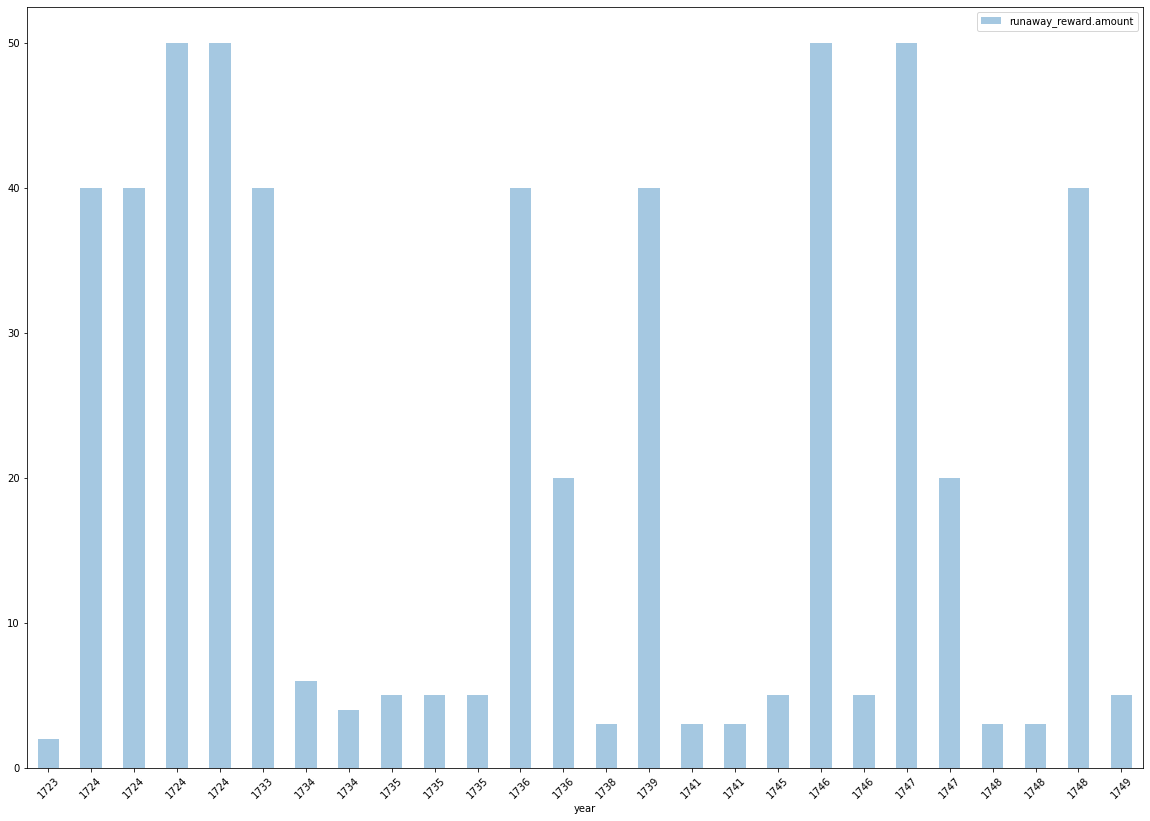

In [230]:
test = fotm_visualization.where((fotm_visualization['advertisement.publication_date'] >='1700') & (fotm_visualization['advertisement.publication_date'] <= '1750')).dropna()

test.plot(x = 'year',
          y='runaway_reward.amount',
          kind = 'bar',
          rot = 45,
          alpha = 0.4,
          figsize=(20,14))

## Visualization using Seaborn 

 This is going to be your best friend```df.loc[df['column_name'] == value]```
 
 

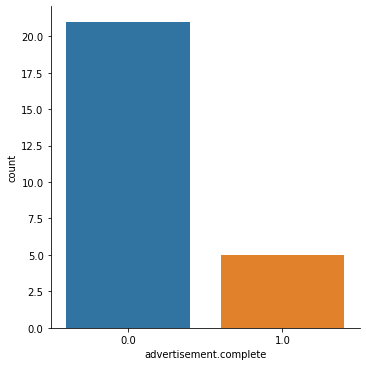

In [231]:
test = fotm_visualization.where((fotm_visualization['advertisement.publication_date'] >='1704') & (fotm_visualization['advertisement.publication_date'] <= '1750')).dropna()

sns.catplot(
         x = 'advertisement.complete',
        data = test,
        kind = 'count')


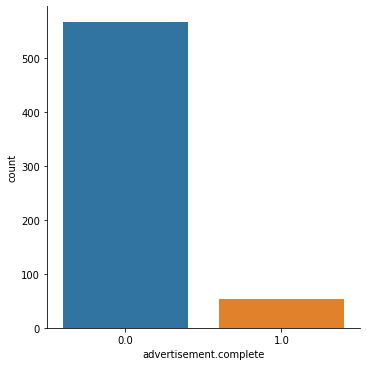

In [68]:
test = fotm_visualization.where((fotm_visualization['advertisement.publication_date'] >='1751') & (fotm_visualization['advertisement.publication_date'] <= '1800')).dropna()

sns.catplot(
         x = 'advertisement.complete',
        data = test,
        kind = 'count')


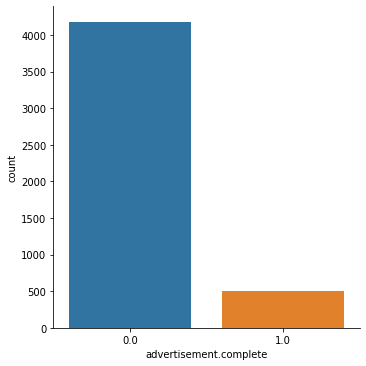

In [69]:
test = fotm_visualization.where((fotm_visualization['advertisement.publication_date'] >='1801') & (fotm_visualization['advertisement.publication_date'] <= '1874')).dropna()

sns.catplot(
         x = 'advertisement.complete',
        data = test,
        kind = 'count')


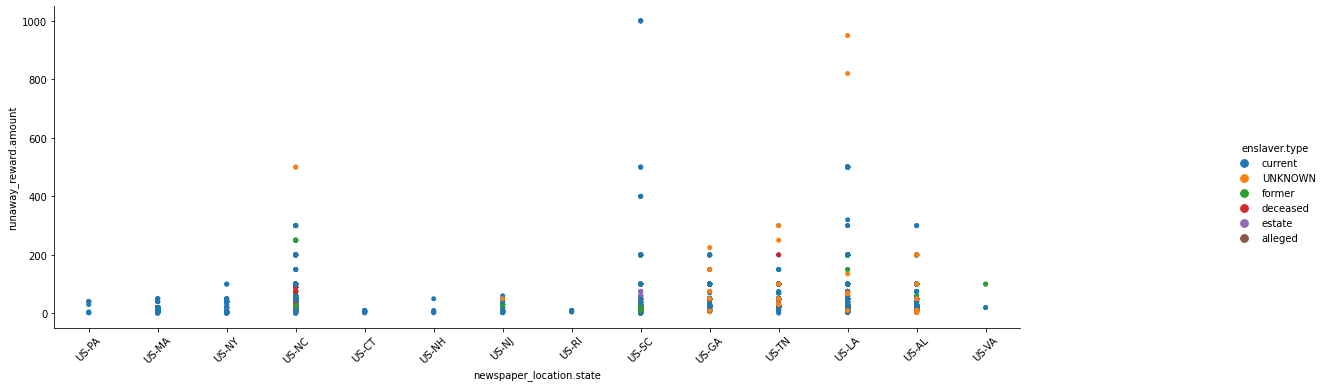

In [237]:
x = sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
         hue = 'enslaver.type',
        data = fotm_visualization,
        jitter = False)

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(20)
x.fig.set_figheight(5)

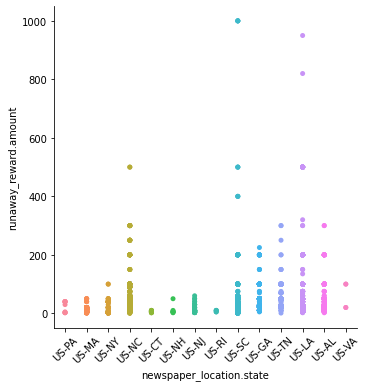

In [70]:
x = sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
        data = fotm_visualization,
        jitter = False)

x.set_xticklabels(rotation=45)

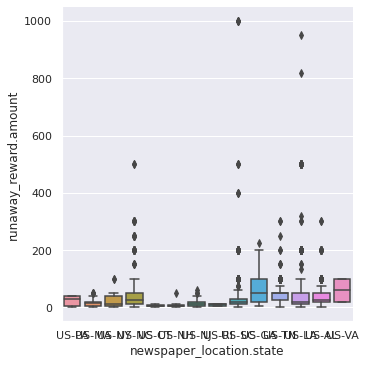

In [211]:
sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
        data = fotm_visualization,
        kind = 'box')

In [ ]:
sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
         hue = 'advertisement.complete',
        data = fotm_visualization,
        kind = )

In [ ]:
testing_module.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 61 to 1002
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   advertisement.publication_date  621 non-null    object 
 1   advertisement.complete          621 non-null    float64
 2   enslaved_person.gender          621 non-null    object 
 3   enslaver.gender                 621 non-null    object 
 4   enslaver.type                   621 non-null    object 
 5   newspaper.name                  621 non-null    object 
 6   runaway_reward.amount           621 non-null    float64
 7   newspaper_location.city         621 non-null    object 
 8   newspaper_location.state        621 non-null    object 
dtypes: float64(2), object(7)
memory usage: 48.5+ KB


In [ ]:
testing_module.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 61 to 1002
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   advertisement.publication_date  621 non-null    object 
 1   advertisement.complete          621 non-null    float64
 2   enslaved_person.gender          621 non-null    object 
 3   enslaver.gender                 621 non-null    object 
 4   enslaver.type                   621 non-null    object 
 5   newspaper.name                  621 non-null    object 
 6   runaway_reward.amount           621 non-null    float64
 7   newspaper_location.city         621 non-null    object 
 8   newspaper_location.state        621 non-null    object 
dtypes: float64(2), object(7)
memory usage: 48.5+ KB


In [ ]:
plt.figure(figsize=(20,5))
x = sns.catplot(#x = 'enslaver.type',
        x = 'runaway_reward.amount',
        #hue = 'enslaver.gender',
            kind="count",
        orient = 'h',
        col="advertisement.complete",
        data = fotm,
       )#.loc[fotm['advertisement.complete'] == True])
x.set_xticklabels(rotation=90)



## Exploring The Boston News-Letter Newspaper 

In [238]:
Boston_Letter_Df = fotm_visualization.loc[fotm_visualization['newspaper.name'] == 'The Daily Picayune']
#Boston_Letter_Df = fotm_dataset_modified.loc[fotm_dataset_modified['runaway_reward.amount'] > 0.0]
Boston_Letter_Df

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,year
4701,1837-04-11,False,FEMALE,UNKNOWN,UNKNOWN,The Daily Picayune,5.0,New Orleans,US-LA,1837
4702,1837-04-11,False,FEMALE,UNKNOWN,UNKNOWN,The Daily Picayune,10.0,New Orleans,US-LA,1837
4703,1837-04-11,False,FEMALE,UNKNOWN,UNKNOWN,The Daily Picayune,135.0,New Orleans,US-LA,1837
4704,1837-04-11,False,MALE,MALE,current,The Daily Picayune,10.0,New Orleans,US-LA,1837
4712,1837-05-03,False,FEMALE,UNKNOWN,current,The Daily Picayune,5.0,New Orleans,US-LA,1837
...,...,...,...,...,...,...,...,...,...,...
8529,1854-12-19,False,MALE,UNKNOWN,UNKNOWN,The Daily Picayune,10.0,New Orleans,US-LA,1854
8530,1854-12-19,False,MALE,MALE,current,The Daily Picayune,100.0,New Orleans,US-LA,1854
8531,1854-12-31,False,MALE,MALE,current,The Daily Picayune,50.0,New Orleans,US-LA,1854
8532,1854-12-31,False,MALE,MALE,current,The Daily Picayune,25.0,New Orleans,US-LA,1854


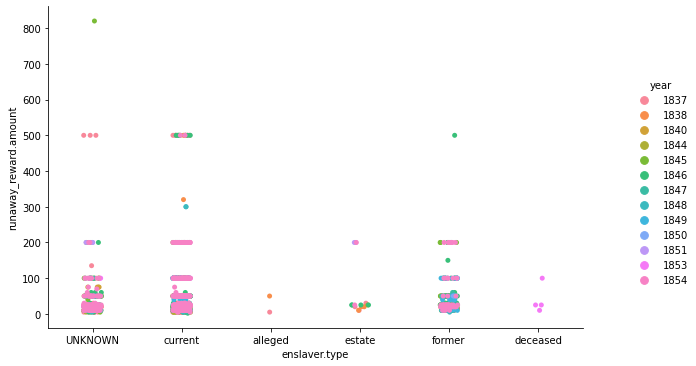

In [247]:
x = sns.catplot(x = 'enslaver.type',
        y = 'runaway_reward.amount',
        hue = 'year',
        data = Boston_Letter_Df)

x.fig.set_figwidth(10)
x.fig.set_figheight(5)

## Looking at a State

In [81]:
fotm_visualization['month_year'] = pd.to_datetime(fotm_visualization['advertisement.publication_date']).dt.to_period('Y')

In [107]:
Lousiana_df = fotm_visualization.loc[fotm_visualization['newspaper_location.state'] == 'US-LA']

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,month_year
1473,1820-06-13,False,MALE,MALE,UNKNOWN,Louisiana Advertiser,20.0,New Orleans,US-LA,1820
1491,1820-12-13,False,MALE,MALE,UNKNOWN,Louisiana Advertiser,100.0,New Orleans,US-LA,1820
2236,1826-06-08,False,MALE,MALE,current,Louisiana State Gazette,50.0,New Orleans,US-LA,1826
2250,1826-06-16,False,MALE,MALE,current,Louisiana State Gazette,20.0,New Orleans,US-LA,1826
2273,1826-07-10,False,MALE,MALE,current,Louisiana State Gazette,25.0,New Orleans,US-LA,1826
...,...,...,...,...,...,...,...,...,...,...
8529,1854-12-19,False,MALE,UNKNOWN,UNKNOWN,The Daily Picayune,10.0,New Orleans,US-LA,1854
8530,1854-12-19,False,MALE,MALE,current,The Daily Picayune,100.0,New Orleans,US-LA,1854
8531,1854-12-31,False,MALE,MALE,current,The Daily Picayune,50.0,New Orleans,US-LA,1854
8532,1854-12-31,False,MALE,MALE,current,The Daily Picayune,25.0,New Orleans,US-LA,1854


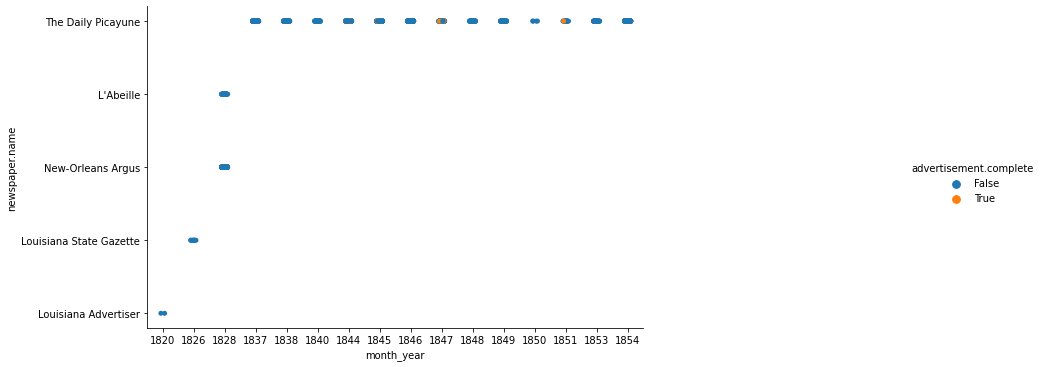

In [113]:
g = sns.catplot(y = 'newspaper.name',
        x = 'month_year',
        hue = 'advertisement.complete',
        data = Lousiana_df)

g.fig.set_figwidth(20)
g.fig.set_figheight(5)

In [ ]:
g = sns.catplot(y = 'newspaper.name',
        x = 'month_year',
        hue = 'enslaver.type',
        data = Lousiana_df)

g.fig.set_figwidth(20)
g.fig.set_figheight(5)

# Conclusion

For this you will write a summary of what steps you followed throughout this notebook, why they were important and your findings.
For example:
- 
- 
- 
- 
- 
- 


You can also add your answers to the questions posted throughout the notebook here. 



## Submission
Run this code block to download your answers.

In [ ]:
from google.colab import files
!zip -r "{student_id}.zip" "{student_id}"
files.download(f"{student_id}.zip")